<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()
from scipy import stats

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df = pd.read_csv('malaria.csv')
df.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
print('Rows of original Data set',df.shape[0],'\n')
a = df.dropna(axis=0, how='all')
print('Rows After dropping complete NA values',a.shape[0],'\n')
print('Yes, their are 4 records.')

Rows of original Data set 127 

Rows After dropping complete NA values 123 

Yes, their are 4 records.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
a = df.isnull().sum()[1:].sum()
a

1166

In [63]:
a= 0.6*df.isnull().sum()

In [68]:
d = df.isnull().sum()>(0.6*df.shape[0])
d[d == True].index

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
v = df['Cases_Guinea'] + df['Deaths_Guinea']
v.isnull().sum()

35

In [107]:
v = df['Cases_Liberia'] + df['Deaths_Liberia']
v.isnull().sum()

48

In [106]:
v = df['Cases_SierraLeone'] + df['Deaths_SierraLeone']
v.isnull().sum()

41

In [108]:
v = df['Cases_Nigeria'] + df['Deaths_Nigeria']
v.isnull().sum()

89

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

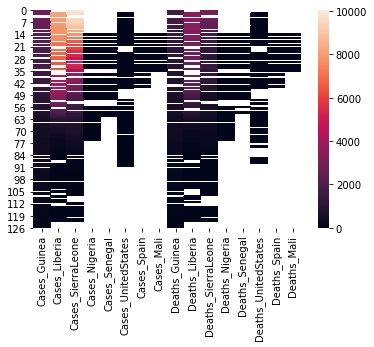

In [87]:
sns.heatmap(df)
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [99]:
#60% thresh
print('columns which are unnecessary are',d[d == True].index)
df[['Cases_Nigeria','Cases_Senegal','Cases_Spain','Cases_Mali','Deaths_Nigeria','Deaths_Senegal','Deaths_Spain','Deaths_Mali']].drop

columns which are unnecessary are Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


<bound method DataFrame.drop of      Cases_Nigeria  Cases_Senegal  Cases_Spain  Cases_Mali  Deaths_Nigeria  \
0              NaN            NaN          NaN         NaN             NaN   
1              NaN            NaN          NaN         NaN             NaN   
2              NaN            NaN          NaN         NaN             NaN   
3              NaN            NaN          NaN         NaN             NaN   
4              NaN            NaN          NaN         NaN             NaN   
..             ...            ...          ...         ...             ...   
122            NaN            NaN          NaN         NaN             NaN   
123            NaN            NaN          NaN         NaN             NaN   
124            NaN            NaN          NaN         NaN             NaN   
125            NaN            NaN          NaN         NaN             NaN   
126            NaN            NaN          NaN         NaN             NaN   

     Deaths_Senegal  Deaths_Spa

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
#original skew and mean
print(df['Cases_UnitedStates'].mean())
print(df['Cases_UnitedStates'].skew())


14.068493150684931
0.4685235032170701


In [48]:
# fillna with mean values
df['usc'] = df['Cases_UnitedStates'].fillna(df['Cases_UnitedStates'].mean())
df['usc']

0      14.068493
1      14.068493
2      20.000000
3      10.000000
4      14.068493
         ...    
122    14.068493
123    14.068493
124    14.068493
125    14.068493
126    14.068493
Name: usc, Length: 127, dtype: float64

In [49]:
# fillna with median values
df['usc1'] = df['Cases_UnitedStates'].fillna(df['Cases_UnitedStates'].median())
df['usc1']

0      13.0
1      13.0
2      20.0
3      10.0
4      13.0
       ... 
122    13.0
123    13.0
124    13.0
125    13.0
126    13.0
Name: usc1, Length: 127, dtype: float64

In [47]:
# check mean and skew after filling mean values
print(df['usc'].mean())
print(df['usc'].skew())

14.068493150684908
0.6124626410712122


In [50]:
# check mean and skew after filling median values
print(df['usc1'].mean())
print(df['usc1'].skew())

13.614173228346457
0.8377393072329335


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
skew then change mean or median

In [3]:
df['Cases_Guinea']

0      2776.0
1      2775.0
2      2769.0
3         NaN
4         NaN
        ...  
122     103.0
123      86.0
124      86.0
125      86.0
126      49.0
Name: Cases_Guinea, Length: 127, dtype: float64

In [5]:
#original skew and mean
print(df['Cases_Guinea'].mean())
print(df['Cases_Guinea'].skew())


911.0645161290323
1.0023009483886705


In [6]:
# fillna with mean values
df['cg'] = df['Cases_Guinea'].fillna(df['Cases_Guinea'].mean())
df['cg']

0      2776.000000
1      2775.000000
2      2769.000000
3       911.064516
4       911.064516
          ...     
122     103.000000
123      86.000000
124      86.000000
125      86.000000
126      49.000000
Name: cg, Length: 127, dtype: float64

In [7]:
# fillna with median values
df['cg1'] = df['Cases_Guinea'].fillna(df['Cases_Guinea'].median())
df['cg1']

0      2776.0
1      2775.0
2      2769.0
3       495.0
4       495.0
        ...  
122     103.0
123      86.0
124      86.0
125      86.0
126      49.0
Name: cg1, Length: 127, dtype: float64

In [12]:
# check mean and skew after filling mean values
print(df['cg'].mean())
print(df['cg'].skew())

911.0645161290319
1.166115725183255


In [11]:
# check mean and skew after filling median values
print(df['cg1'].mean())
print(df['cg1'].skew())

799.6771653543307
1.470798427432212


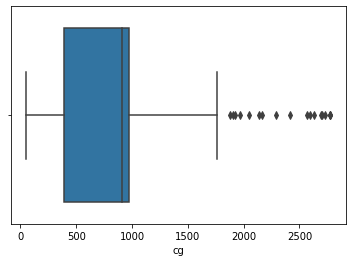

In [289]:
sns.boxplot(df['cg'])
plt.show()

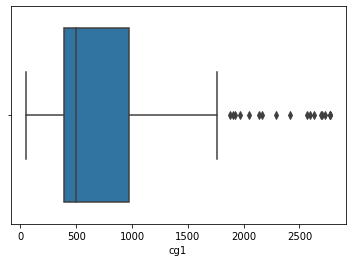

In [288]:
sns.boxplot(df['cg1'])
plt.show()

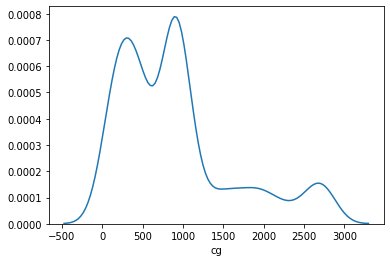

In [287]:
sns.distplot(df['cg'], hist=False)
plt.show()

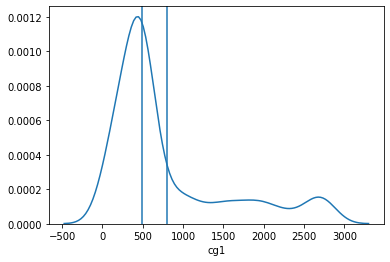

In [286]:
sns.distplot(df['cg1'], hist=False)
plt.axvline(df['cg1'].mean())
plt.axvline(df['cg1'].median())
plt.show()

C:\Users\Danish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Danish\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


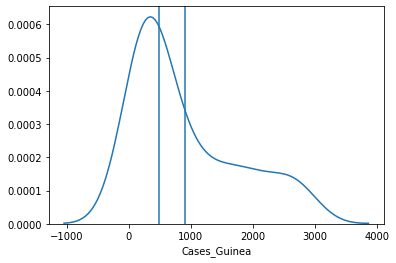

In [285]:
sns.distplot(df['Cases_Guinea'], hist=False)
plt.axvline(df['Cases_Guinea'].mean())
plt.axvline(df['Cases_Guinea'].median())
plt.show()

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [31]:
df1 = pd.read_csv('house.csv')
df1.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

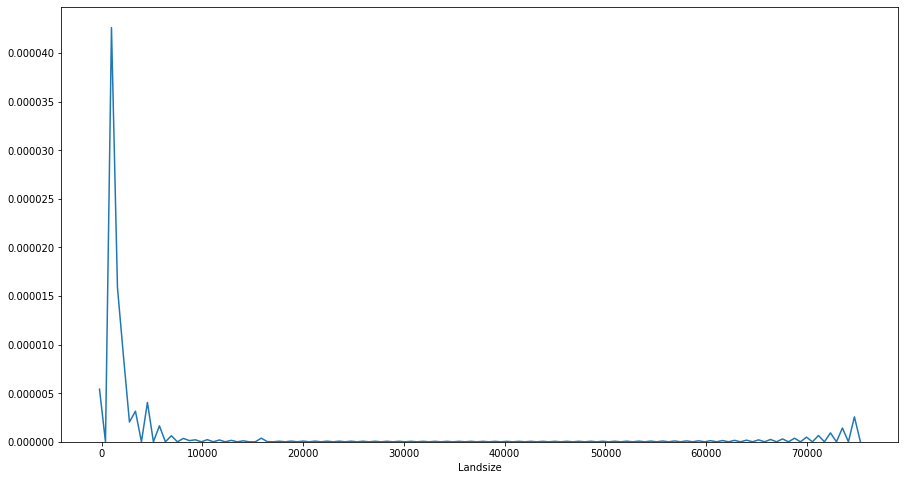

In [63]:
plt.figure(figsize=(15,8))
sns.distplot(df1['Landsize'], hist=False)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
df1.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

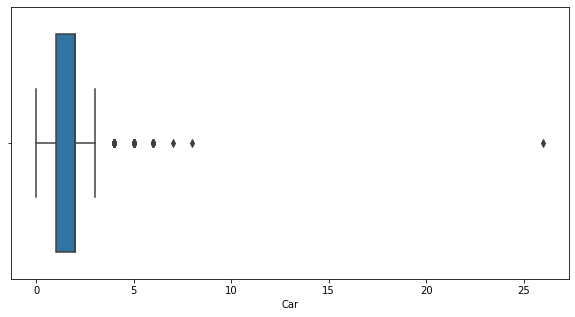

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(df1['Car'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
# type your code here x type y price
df1['Type'].unique()

array(['h', 't', 'u'], dtype=object)

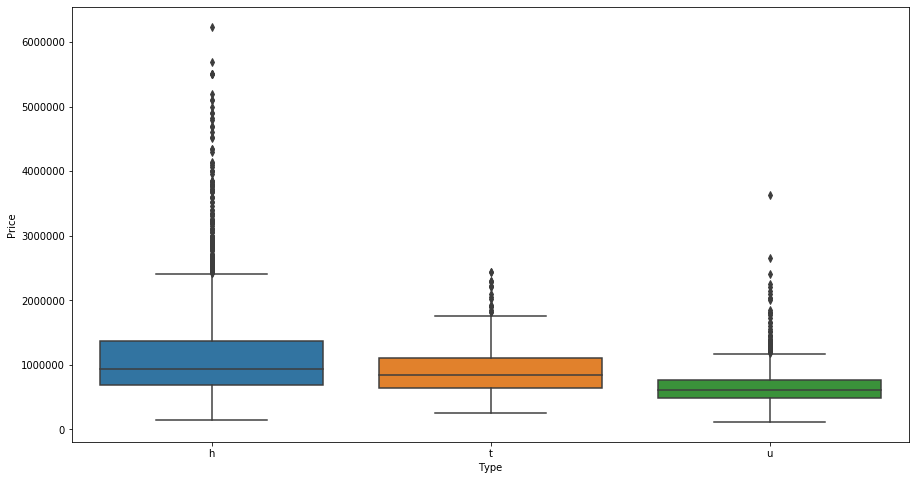

In [85]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df1, x='Type', y='Price')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
# Extreme values 
q1 = df1['Bedroom'].quantile(0.25)
q2 = df1['Bedroom'].quantile(0.5)
q3 = df1['Bedroom'].quantile(0.75)
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR

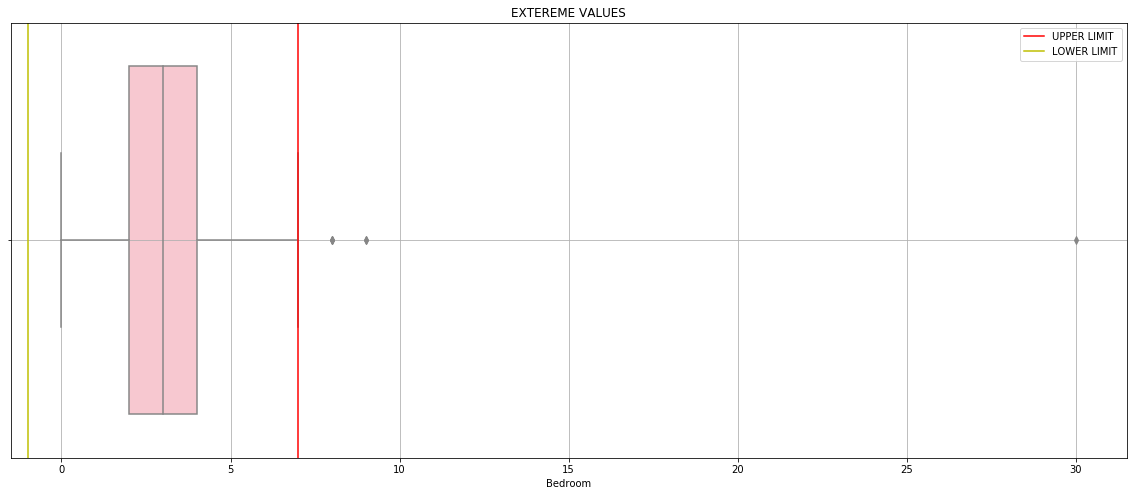

In [106]:
plt.figure(figsize=(20,8))
sns.boxplot(df1['Bedroom'], color='pink')
plt.axvline(UL,color='r', label='UPPER LIMIT')
plt.axvline(LL,color='y', label='LOWER LIMIT')
plt.title('EXTEREME VALUES')
plt.legend()
plt.grid()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Methods used to determine outliers


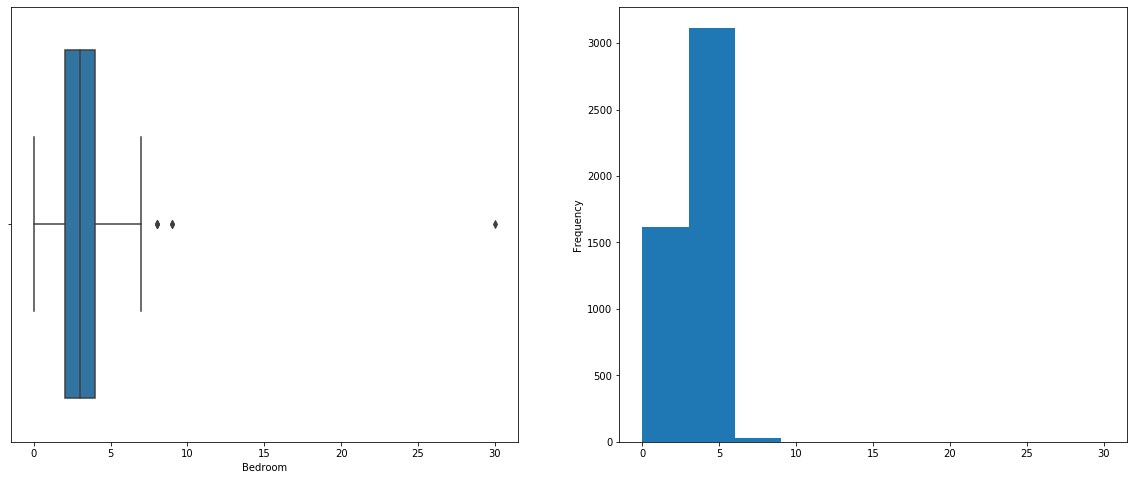

In [118]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

print('Methods used to determine outliers')

sns.boxplot(df1['Bedroom'], ax= axes[0])

df1['Bedroom'].plot(kind='hist')

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
q1 = df1['Bedroom'].quantile(0.25)
q2 = df1['Bedroom'].quantile(0.5)
q3 = df1['Bedroom'].quantile(0.75)
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR

In [139]:
# Extraction of OutLiers FOr feature Bedroom
df1[(df1['BedroomTB']<LL)   |   (df1['BedroomTB']>UL)]

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,BedroomTB
15,2,h,2110000,S,Southern Metropolitan,1,2,220,18.4,1,-1.833686
22,3,u,955000,S,Southern Metropolitan,1,1,138,22.5,1,-1.833686
36,3,t,920000,SP,Southern Metropolitan,1,0,162,21.1,1,-1.833686
38,4,h,1460000,S,Southern Metropolitan,1,0,182,19.6,1,-1.833686
43,3,h,980000,PI,Eastern Metropolitan,1,1,580,16.9,1,-1.833686
...,...,...,...,...,...,...,...,...,...,...,...
4582,3,t,560000,S,Northern Metropolitan,2,6,1200,19.5,1,-1.833686
4592,3,h,1182000,S,Northern Metropolitan,1,2,531,20.3,1,-1.833686
4603,3,u,810000,S,Southern Metropolitan,1,1,0,22.4,1,-1.833686
4623,4,h,450000,S,Western Metropolitan,1,1,409,28.0,1,-1.833686


In [137]:
# Extraction of Cleaned Data
df_cc = df1[(df1['BedroomTB']>LL)   &   (df1['BedroomTB']<UL)]

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

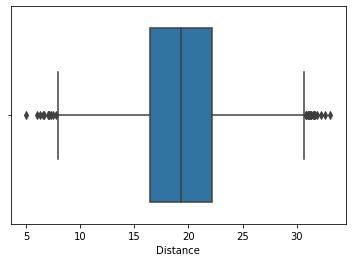

In [141]:
sns.boxplot(df1['Distance'])

In [142]:
df1['Distance'].mean()

19.32834662190515

In [145]:
stats.trim_mean(df1['Distance'],0.10)

19.32244362873623

#### Their is no change in mean even after we remove outliers.It gives us that data is symmetric.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

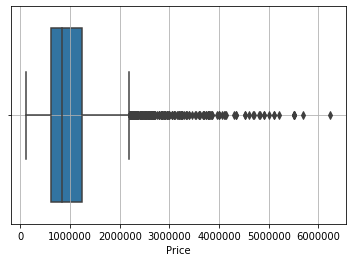

In [151]:
# type your code here
sns.boxplot(df1['Price'],whis=1.5)
plt.grid()
plt.show()

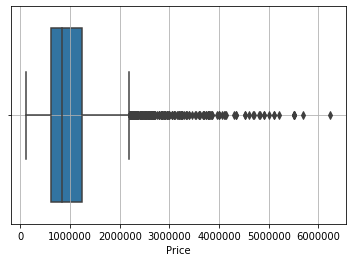

In [158]:
# type your code here
sns.boxplot(df1['Price'],whis=1.5)
plt.grid()
plt.show()

In [154]:
q1 = df1['Price'].quantile(0.25)
q2 = df1['Price'].quantile(0.5)
q3 = df1['Price'].quantile(0.75)
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR

In [172]:
whis = (5310000-q3)/IQR
whis

6.513015618742491

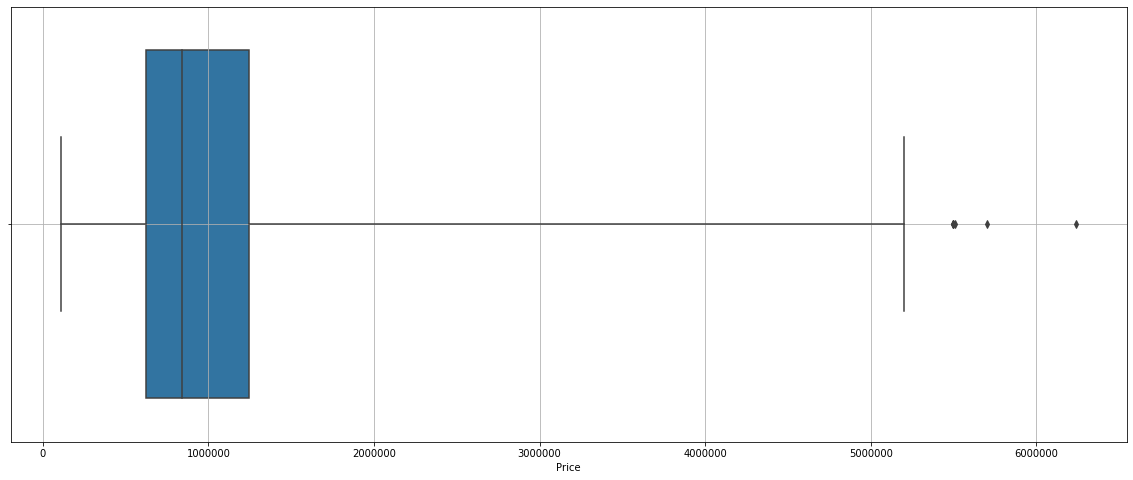

In [173]:
plt.figure(figsize=(20,8))
sns.boxplot(df1['Price'],whis=whis)
plt.grid()
plt.show()

#### Value of K should be in a range of 6.3 to 6.5 to take in densely populated outliers

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
df1

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3
...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3


In [227]:
print(df1['Distance'].min(),'--',df1['Distance'].max())

5.0 -- 33.1


In [224]:
df1['Distance Range'] = pd.cut(df1['Distance'], bins=[5,15,25,35])

In [228]:
df1['Distance Range'].unique()

[(25.0, 35.0], (15.0, 25.0], (5.0, 15.0], NaN]
Categories (3, interval[int64]): [(5, 15] < (15, 25] < (25, 35]]

In [239]:
df1

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,BedroomTB,Distance Range
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2,-0.889096,"(25, 35]"
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2,-0.889096,"(15, 25]"
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2,-0.889096,"(15, 25]"
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3,0.055494,"(15, 25]"
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3,0.055494,"(15, 25]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,0.055494,"(15, 25]"
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,1.000084,"(15, 25]"
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,0.055494,"(15, 25]"
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,0.055494,"(15, 25]"


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

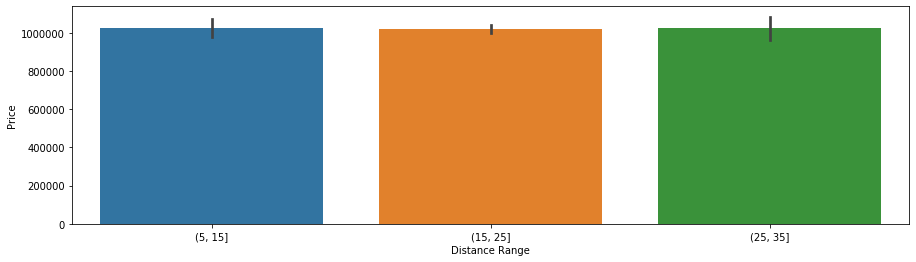

In [252]:
plt.figure(figsize=(15,4))
sns.barplot(data=df1, x='Distance Range', y='Price')
plt.show()

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [255]:
Y = df1['Price']

In [276]:
X= df1.drop(['Price'], axis=1)

In [278]:
df1.shape

(4766, 12)

In [279]:
X.shape

(4766, 11)

In [280]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)

In [281]:
x_train.shape

(3812, 11)

In [282]:
y_train.shape

(3812,)

In [283]:
x_test.shape

(954, 11)

In [284]:
y_test.shape

(954,)